In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [3]:
data = pd.read_csv('/Users/anastasia/Downloads/Marketing+Data/marketing_data.csv')
dictionary = pd.read_csv('/Users/anastasia/Downloads/Marketing+Data/marketing_data_dictionary.csv')
df_ml_clean = pd.read_csv('/Users/anastasia/Downloads/df_ml_clean.csv')

In [4]:
df_ml_clean

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children
0,1826,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,...,False,False,False,False,False,True,False,Spain,44,0
1,1,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,...,False,False,False,False,True,True,False,Canada,53,0
2,10476,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,...,False,False,False,False,False,False,False,USA,56,1
3,1386,Graduation,Together,32474.0,2014-05-11,0,10,0,1,0,...,False,False,False,False,False,False,False,Australia,47,2
4,5371,Graduation,Single,21474.0,2014-04-08,0,6,16,24,11,...,True,False,False,False,False,True,False,Spain,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,10142,PhD,Divorced,66476.0,2013-03-07,99,372,18,126,47,...,False,False,False,False,False,False,False,USA,38,1
2105,5263,2n Cycle,Married,31056.0,2013-01-22,99,5,10,13,3,...,False,False,False,False,False,False,False,Spain,37,1
2106,22,Graduation,Divorced,46310.0,2012-12-03,99,185,2,88,15,...,False,False,False,False,False,False,False,Spain,38,1
2107,528,Graduation,Married,65819.0,2012-11-29,99,267,38,701,149,...,False,False,False,False,False,False,False,India,36,0


# 1. Гипотеза: количество покупок в определенных каналах коррелирует с возрастом клиентов

In [5]:
data2 = df_ml_clean

In [6]:
age = data2[['Age','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

In [7]:
age.corr()

,Age,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age,1.000000,0.165143,0.151847,0.152309
NumWebPurchases,0.165143,1.000000,0.414358,0.508774
NumCatalogPurchases,0.151847,0.414358,1.000000,0.554520
NumStorePurchases,0.152309,0.508774,0.554520,1.000000


<AxesSubplot:>

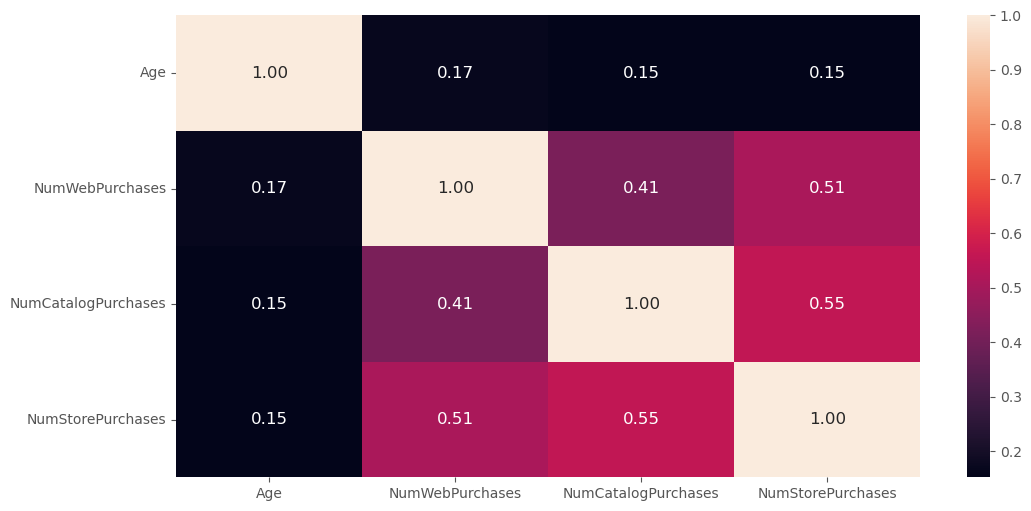

In [8]:
sns.heatmap(age.corr(),annot=True,annot_kws={"size":12},fmt=".2f")

### Возраст клиентов не коррелирует с количеством покупок в определенных каналах

# 2. Кластреизация клиентов

Разделим клиентов на кластеры, чтобы более точечно запускать на них рекламу

In [9]:
df = data2[['Age','Country','Marital_Status','Children','Income','NumDealsPurchases',\
            'MntWines', 'MntFruits', 'MntMeatProducts', \
          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',\
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]

In [10]:
df

,Age,Country,Marital_Status,Children,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,44,Spain,Divorced,0,84835.0,1,189,104,379,111,189,218,4,4,6,1
1,53,Canada,Single,0,57091.0,1,464,5,64,7,0,37,7,3,7,5
2,56,USA,Married,1,67267.0,1,134,11,59,15,2,30,3,2,5,2
3,47,Australia,Together,2,32474.0,1,10,0,1,0,0,0,1,0,2,7
4,25,Spain,Single,1,21474.0,2,6,16,24,11,0,34,3,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,38,USA,Divorced,1,66476.0,2,372,18,126,47,48,78,5,2,11,4
2105,37,Spain,Married,1,31056.0,1,5,10,13,3,8,16,1,0,3,8
2106,38,Spain,Divorced,1,46310.0,2,185,2,88,15,5,14,6,1,5,8
2107,36,India,Married,0,65819.0,1,267,38,701,149,165,63,5,4,10,3


/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/86936450.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country_encoded'] = label_encoder.fit_transform(df['Country'])
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/86936450.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MS_encoded'] = label_encoder.fit_transform(df['Marital_Status'])


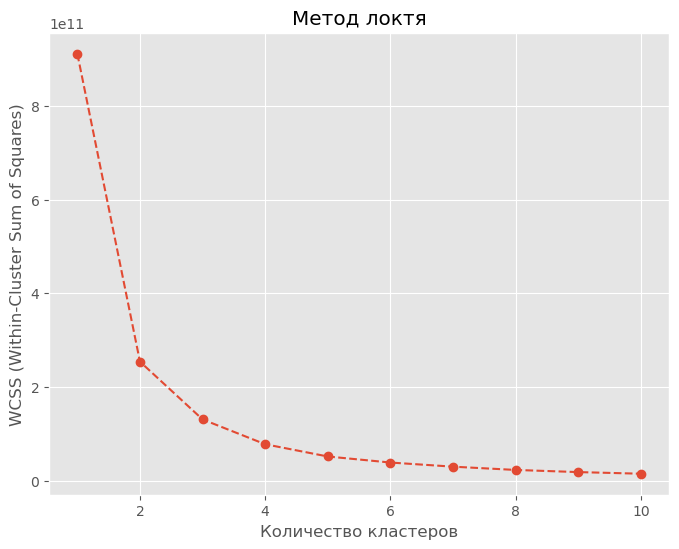

      Age  Children   Income  NumDealsPurchases  Country_encoded  MS_encoded  \
0      44         0  84835.0                  1                6           0   
1      53         0  57091.0                  1                1           2   
2      56         1  67267.0                  1                7           1   
3      47         2  32474.0                  1                0           3   
4      25         1  21474.0                  2                6           2   
...   ...       ...      ...                ...              ...         ...   
2104   38         1  66476.0                  2                7           0   
2105   37         1  31056.0                  1                6           1   
2106   38         1  46310.0                  2                6           0   
2107   36         0  65819.0                  1                3           1   
2108   45         2  94871.0                  1                1           1   

      MntWines  MntFruits  MntMeatProdu

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/86936450.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/86936450.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


NameError: name 'scaler' is not defined

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = df

X = data

label_encoder = LabelEncoder()

df['Country_encoded'] = label_encoder.fit_transform(df['Country'])
df['MS_encoded'] = label_encoder.fit_transform(df['Marital_Status'])


X = df[['Age','Children','Income','NumDealsPurchases','Country_encoded','MS_encoded','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


X_scaled = X

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# На основе графика выбираем оптимальное количество кластеров
k = 3 

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)

kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

# Выводим результаты кластеризации
print(df[['Age','Children','Income','NumDealsPurchases','Country_encoded','MS_encoded','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Cluster']])


# Применение метода k-средних
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Добавление меток кластеров в исходные данные
data['Cluster'] = kmeans.labels_

# Анализ результатов
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Вывод информации о кластерах
for cluster_id, size in cluster_sizes.items():
    print(f'Кластер {cluster_id}:')
    print(f'Размер кластера: {size}')
    print(f'Средние значения признаков:')
    print(cluster_centers.loc[cluster_id])
    print('\n')

# Дополнительные анализы и маркетинговые стратегии могут быть разработаны на основе результатов


In [ ]:
import matplotlib.pyplot as plt

# Разделим данные по кластерам
clustered_data = [X[df['Cluster'] == i] for i in range(n_clusters)]

# Цвета для кластеров
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Визуализация кластеров
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(clustered_data[i]['Age'], clustered_data[i]['Income'], c=colors[i], label=f'Cluster {i}')

# Добавляем метки и легенду
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Визуализация кластеров')
plt.legend()
plt.show()


In [12]:
df.describe()

,Age,Children,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country_encoded,MS_encoded,Cluster
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,44.976766,0.901375,51750.263632,2.288762,309.739687,26.782361,168.085349,38.421053,27.613561,44.818397,4.141773,2.680891,5.866287,5.315789,4.475107,1.730204,1.019440
std,11.733721,0.686508,20793.269910,1.845702,338.113681,39.892117,219.757854,55.221222,41.363192,52.245913,2.742128,2.808756,3.254416,2.421606,2.181728,1.061998,0.823113
min,18.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,35196.000000,1.000000,24.000000,2.000000,16.000000,3.000000,2.000000,9.000000,2.000000,0.000000,3.000000,3.000000,3.000000,1.000000,0.000000
50%,44.000000,1.000000,51518.000000,2.000000,183.000000,9.000000,69.000000,13.000000,9.000000,25.000000,4.000000,2.000000,5.000000,6.000000,6.000000,2.000000,1.000000
75%,55.000000,1.000000,68627.000000,3.000000,512.000000,33.000000,238.000000,51.000000,35.000000,57.000000,6.000000,4.000000,8.000000,7.000000,6.000000,3.000000,2.000000
max,74.000000,2.000000,113734.000000,15.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,20.000000,7.000000,4.000000,2.000000


In [13]:
#люди постарше с высоким доходом
df[df['Cluster'] == 0].describe()

,Age,Children,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country_encoded,MS_encoded,Cluster
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0
mean,46.589337,0.449568,75509.711816,1.610951,621.380403,56.548991,387.234870,81.625360,59.612392,71.505764,5.537464,5.318444,8.512968,3.293948,4.396254,1.729107,0.0
std,12.494268,0.595479,8245.180442,1.333851,320.656905,48.240108,239.479277,65.658773,50.911245,59.672307,2.422992,2.496931,2.801098,1.956244,2.227997,1.083173,0.0
min,19.000000,0.000000,63516.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,38.000000,0.000000,68758.500000,1.000000,378.500000,21.000000,183.250000,29.000000,20.000000,27.000000,4.000000,3.000000,6.000000,2.000000,2.000000,1.000000,0.0
50%,46.000000,0.000000,74805.500000,1.000000,571.500000,38.500000,352.000000,65.000000,42.000000,53.000000,5.000000,5.000000,9.000000,3.000000,6.000000,2.000000,0.0
75%,57.000000,1.000000,80940.000000,2.000000,832.250000,82.750000,545.750000,124.000000,91.000000,102.000000,7.000000,7.000000,11.000000,5.000000,6.000000,3.000000,0.0
max,73.000000,2.000000,113734.000000,15.000000,1493.000000,197.000000,984.000000,258.000000,262.000000,249.000000,27.000000,11.000000,13.000000,9.000000,7.000000,4.000000,0.0


In [14]:
# люди помоложе с доходом поменьше
df[df['Cluster'] == 1].describe()

,Age,Children,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country_encoded,MS_encoded,Cluster
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.0
mean,40.605882,1.072059,27828.416176,2.138235,29.245588,5.844118,25.070588,9.192647,6.135294,17.732353,2.138235,0.533824,3.058824,6.905882,4.522059,1.723529,1.0
std,10.737213,0.622917,8341.635922,1.633146,44.072306,11.662250,71.969440,19.218140,11.985113,29.349885,1.870241,1.306617,1.075670,1.977777,2.149655,0.996329,0.0
min,18.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,32.000000,1.000000,22515.250000,1.000000,5.000000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,0.000000,2.000000,6.000000,3.000000,1.000000,1.0
50%,39.000000,1.000000,29267.000000,2.000000,13.000000,3.000000,13.000000,4.000000,3.000000,10.000000,2.000000,0.000000,3.000000,7.000000,6.000000,2.000000,1.0
75%,47.000000,1.000000,34597.000000,3.000000,31.000000,6.000000,23.000000,10.000000,7.000000,20.000000,3.000000,1.000000,3.000000,8.000000,6.000000,3.000000,1.0
max,68.000000,2.000000,39552.000000,15.000000,284.000000,151.000000,1725.000000,208.000000,157.000000,321.000000,25.000000,28.000000,9.000000,20.000000,7.000000,4.000000,1.0


In [15]:
# люди постарше со средним доходом
df[df['Cluster'] == 2].describe()

,Age,Children,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country_encoded,MS_encoded,Cluster
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0
mean,47.497959,1.170068,51447.949660,3.068027,274.987755,18.047619,93.473469,24.668027,17.270748,44.678912,4.677551,2.176871,5.964626,5.753741,4.506122,1.737415,2.0
std,10.716799,0.606214,7011.542497,2.138463,252.036520,30.448047,99.122301,39.999506,28.826341,48.243962,2.639714,2.022020,2.829169,1.791756,2.167924,1.101350,0.0
min,22.000000,0.000000,39660.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.0
25%,39.000000,1.000000,45203.500000,1.000000,74.500000,1.000000,26.000000,2.000000,1.000000,11.000000,2.000000,1.000000,4.000000,5.000000,3.000000,1.000000,2.0
50%,47.000000,1.000000,51287.000000,2.000000,202.000000,6.000000,64.000000,8.000000,6.000000,27.000000,4.000000,2.000000,5.000000,6.000000,6.000000,2.000000,2.0
75%,57.000000,2.000000,57379.000000,4.000000,398.000000,19.000000,127.500000,28.500000,19.000000,58.500000,7.000000,3.000000,8.000000,7.000000,6.000000,3.000000,2.0
max,74.000000,2.000000,63404.000000,13.000000,1241.000000,199.000000,706.000000,259.000000,192.000000,247.000000,11.000000,11.000000,13.000000,10.000000,7.000000,4.000000,2.0


# 3. Корреляция

In [19]:
df.corr().style.set_sticky(axis=0)

,Age,Children,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country_encoded,MS_encoded,Cluster
Age,1.000000,0.066380,0.216542,0.062935,0.171988,0.019237,0.049676,0.050294,0.027620,0.067315,0.165143,0.151847,0.152309,-0.131750,-0.006999,0.058884,0.036050
Children,0.066380,1.000000,-0.373887,0.454905,-0.367614,-0.402913,-0.535183,-0.430556,-0.394900,-0.266013,-0.140239,-0.463347,-0.322489,0.429079,-0.006074,-0.030007,0.429025
Income,0.216542,-0.373887,1.000000,-0.147818,0.729254,0.536792,0.700967,0.549769,0.555188,0.416780,0.502909,0.708081,0.687406,-0.649142,-0.012801,0.007137,-0.463187
NumDealsPurchases,0.062935,0.454905,-0.147818,1.000000,0.003975,-0.136773,-0.173722,-0.139792,-0.122005,0.053910,0.244604,-0.061645,0.071428,0.370170,0.000667,-0.024128,0.325731
MntWines,0.171988,-0.367614,0.729254,0.003975,1.000000,0.380535,0.589953,0.390739,0.385008,0.388411,0.548828,0.669839,0.635731,-0.328226,0.005200,0.007940,-0.412194
MntFruits,0.019237,-0.402913,0.536792,-0.136773,0.380535,1.000000,0.565427,0.584682,0.561074,0.391985,0.298692,0.507997,0.454341,-0.421201,-0.013539,0.003036,-0.391201
MntMeatProducts,0.049676,-0.535183,0.700967,-0.173722,0.589953,0.565427,1.000000,0.591226,0.551656,0.370890,0.325422,0.710177,0.511468,-0.542217,-0.002030,0.029037,-0.542685
MntFishProducts,0.050294,-0.430556,0.549769,-0.139792,0.390739,0.584682,0.591226,1.000000,0.574618,0.424430,0.295031,0.555362,0.451933,-0.446714,-0.003512,0.047795,-0.418431
MntSweetProducts,0.027620,-0.394900,0.555188,-0.122005,0.385008,0.561074,0.551656,0.574618,1.000000,0.352007,0.329677,0.518269,0.450677,-0.426063,-0.002149,0.017226,-0.415342
MntGoldProds,0.067315,-0.266013,0.416780,0.053910,0.388411,0.391985,0.370890,0.424430,0.352007,1.000000,0.400925,0.468244,0.383529,-0.250452,-0.035067,0.005862,-0.205438


<AxesSubplot:>

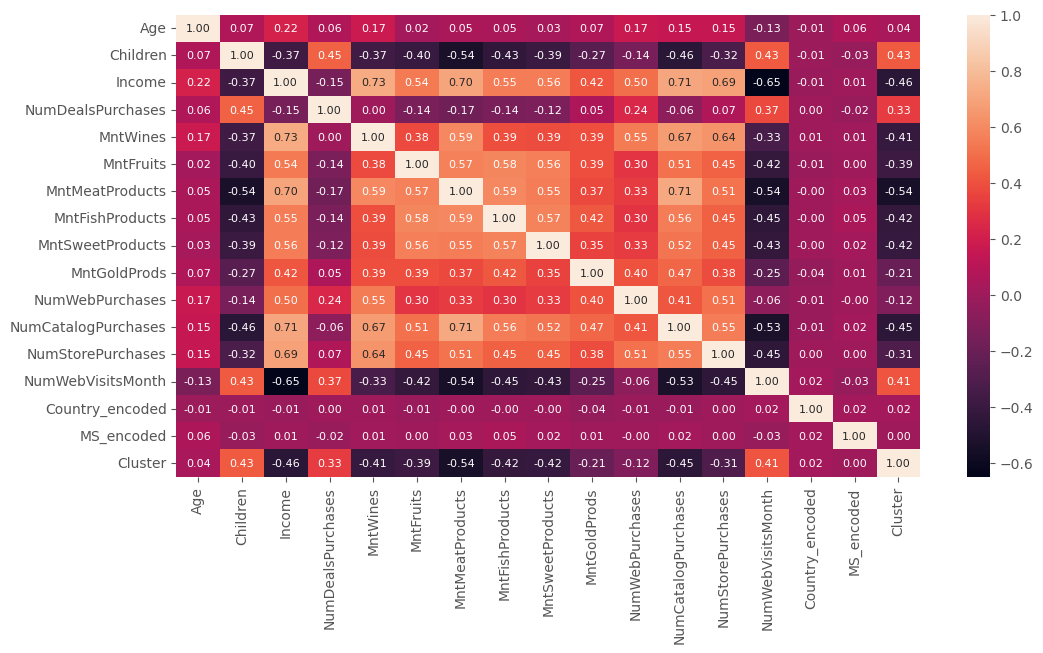

In [20]:
sns.heatmap(df.corr(),annot=True,annot_kws={"size":8},fmt=".2f")

# Построим регрессию (линейная, как мы выясним, не подойдет, поэтому полиномиальную)

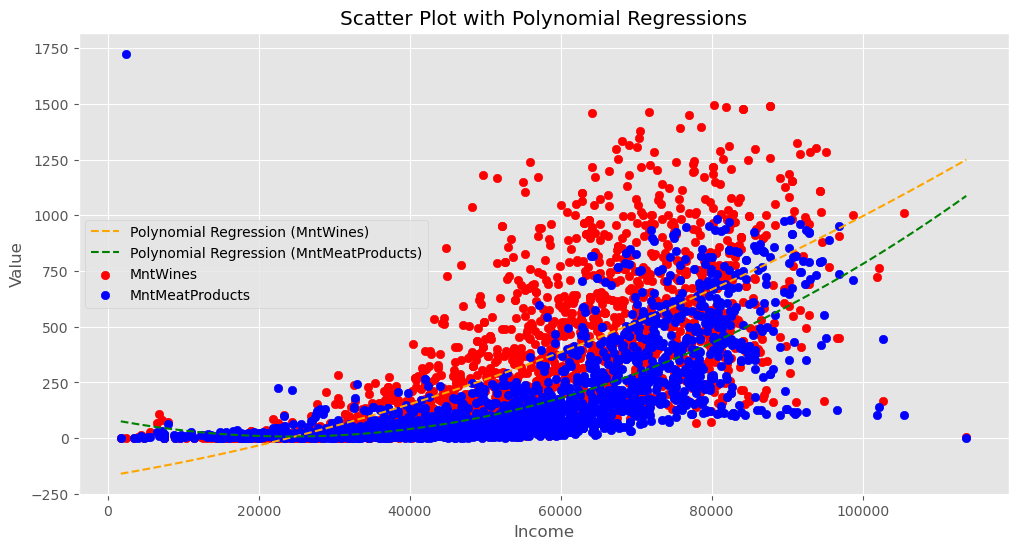

In [85]:
# Создаем датафрейм с выбранными признаками
selected_features = ['Income', 'MntWines', 'MntMeatProducts']
df_selected = df[selected_features]

# Разделим данные на признаки (X) и две целевые переменные (y1 и y2)
X = df_selected['Income']
y1 = df_selected['MntWines']
y2 = df_selected['MntMeatProducts']

# Зададим степень полинома
degree = 2

# Создадим полиномиальные коэффициенты
coeffs1 = np.polyfit(X, y1, degree)
coeffs2 = np.polyfit(X, y2, degree)

# Создадим полиномиальные моделей
polyreg1 = np.poly1d(coeffs1)
polyreg2 = np.poly1d(coeffs2)

# Построение полиномиальных регрессионных линий
X_range = np.linspace(X.min(), X.max(), 100)  # Создание значений X для гладкой линии
plt.plot(X_range, polyreg1(X_range), color='orange', linestyle='--', label='Polynomial Regression (MntWines)')
plt.plot(X_range, polyreg2(X_range), color='green', linestyle='--', label='Polynomial Regression (MntMeatProducts)')

# Построение scatter plot для 'MntWines' относительно 'Income' с красными точками
plt.scatter(X, y1, color='red', label='MntWines')

# Построение scatter plot для 'MntMeatProducts' относительно 'Income' с синими точками
plt.scatter(X, y2, color='blue', label='MntMeatProducts')

plt.xlabel('Income')
plt.ylabel('Value')
plt.legend()
plt.title('Scatter Plot with Polynomial Regressions')
plt.show()


# 4. Классификация клиентов, которые покупают и не покупают со скидками

In [28]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
data2.columns.to_list()

['ID',
 'Education',
 'Marital_Status',
 'Income',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country',
 'Age',
 'Children']

### Первоначально мы не можем знать об объеме покупок клиентов, так что для построения модели оставим только признаки, о которых предположительно можем узнать сразу — Education, Marital_Status, Income, Country, Age, Children

## Random Forest 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

data = data2[['Age', 'Income', 'Children','Education','Marital_Status','Country','NumDealsPurchases']]

# Кодируем категориальные переменные
data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status', 'Country'], drop_first=True)

# Создадим новую колонку 'Binary_Target' и установим начальное значение 0
data_encoded['Binary_Target'] = 0

# Установим значение 1 для всех классов больше 0
data_encoded.loc[data_encoded['NumDealsPurchases'] > 1, 'Binary_Target'] = 1

n = ['Age',
 'Income',
 'Children',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Country_Canada',
 'Country_Germany',
 'Country_India',
 'Country_Mexico',
 'Country_Saudi Arabia',
 'Country_Spain',
 'Country_USA']

# Разделение данных на обучающую и тестовую выборки
X = data_encoded[n] 
y = data_encoded['Binary_Target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Создание и обучение модели (случайный лес)
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       682
           1       0.73      0.84      0.78       795

    accuracy                           0.75      1477
   macro avg       0.75      0.74      0.74      1477
weighted avg       0.75      0.75      0.74      1477



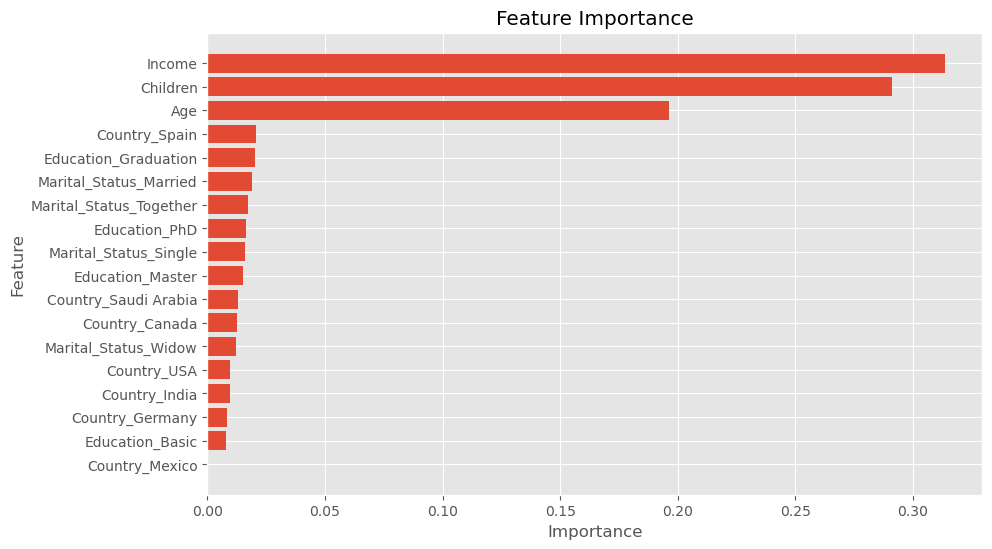

In [36]:
# Посмотрим на важность признаков из модели
feature_importance = model.feature_importances_

# Создаем DataFrame для отображения важности признаков
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

### Видим, что наиболее важные признаки — Income, Children и Age 

In [82]:
data = data2[['Age', 'Income', 'Children','NumDealsPurchases']]

# Создадим новую колонку 'Binary_Target' и установим начальное значение 0
data['Binary_Target'] = 0

# Установим значение 1 для всех классов больше 0
data.loc[data['NumDealsPurchases'] > 1, 'Binary_Target'] = 1

n = ['Age',
 'Income',
 'Children']

# Разделение данных на обучающую и тестовую выборки
X = data[n] 
y = data['Binary_Target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=142)

# Создание и обучение модели (случайный лес)
model = RandomForestClassifier(n_estimators=390, random_state=142)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/495415973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Binary_Target'] = 0


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       673
           1       0.74      0.84      0.79       804

    accuracy                           0.75      1477
   macro avg       0.76      0.75      0.75      1477
weighted avg       0.76      0.75      0.75      1477



# Логистическая регрессия

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных (предполагается, что у вас есть CSV-файл с данными)
data = data2[['Income', 'Age', 'Children', 'NumDealsPurchases']]

# Создайте новую колонку 'Binary_Target' и установите начальное значение 0
data['Binary_Target'] = 0

# Установите значение 1 для всех классов больше 0
data.loc[data['NumDealsPurchases'] > 1, 'Binary_Target'] = 1

# Разделение данных на обучающую и тестовую выборки
X = data[['Income', 'Age', 'Children']]  
y = data['Binary_Target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=142)

# Создание и обучение модели (логистическая регрессия)
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Прогнозирование
y_pred = logistic_regression_model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Отчет о классификации
print(classification_report(y_test, y_pred))
                    

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.88      0.57      0.69       673
           1       0.72      0.93      0.81       804

    accuracy                           0.77      1477
   macro avg       0.80      0.75      0.75      1477
weighted avg       0.79      0.77      0.76      1477



/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/4177944034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Binary_Target'] = 0


# Градиентный бустинг

In [81]:
from sklearn.ensemble import GradientBoostingClassifier


data = data2[['Income', 'Age', 'Children', 'NumDealsPurchases']]

data_encoded_2 = data
# Создаем новую колонку 'Binary_Target' и устанавливаем начальное значение 0
data_encoded_2['Binary_Target'] = 0

# Установливаем значение 1 для всех классов больше 0
data_encoded_2.loc[data_encoded_2['NumDealsPurchases'] > 1, 'Binary_Target'] = 1

# Разделяем данные на обучающую и тестовую выборки
X = data_encoded_2[['Income', 'Age', 'Children']] 
y = data_encoded_2['Binary_Target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=242)


# Создание и обучение модели (градиентный бустинг)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=10, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Прогнозирование
y_pred = gradient_boosting_model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Отчет о классификации
print(classification_report(y_test, y_pred))


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.88      0.60      0.72       663
           1       0.74      0.94      0.83       814

    accuracy                           0.79      1477
   macro avg       0.81      0.77      0.77      1477
weighted avg       0.81      0.79      0.78      1477



/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/3677949810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded_2['Binary_Target'] = 0


# Наивный байесовский классификатор

In [84]:
from sklearn.naive_bayes import GaussianNB

data = data2[['Income', 'Age', 'Children', 'NumDealsPurchases']]

data_encoded_2 = data
# Создаем новую колонку 'Binary_Target' и устанавливаем начальное значение 0
data_encoded_2['Binary_Target'] = 0

# Установливаем значение 1 для всех классов больше 0
data_encoded_2.loc[data_encoded_2['NumDealsPurchases'] > 1, 'Binary_Target'] = 1

# Разделяем данные на обучающую и тестовую выборки
X = data_encoded_2[['Income', 'Age', 'Children']] 
y = data_encoded_2['Binary_Target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=242)


# Создание и обучение модели (Наивный байесовский классификатор)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Прогнозирование
y_pred = naive_bayes_model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Отчет о классификации
print(classification_report(y_test, y_pred))


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       663
           1       0.74      0.85      0.79       814

    accuracy                           0.76      1477
   macro avg       0.76      0.75      0.75      1477
weighted avg       0.76      0.76      0.75      1477



/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36225/2323696268.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded_2['Binary_Target'] = 0


## Градиентный бустинг наиболее успешно справился с задачей классификации